# Условное математическое ожидание. Задача 1


__Ильичёв А.С., 693__

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Вывод формулы.

По условию $\forall s < t$ величина $N_t - N_s \sim Pois(\lambda(t-s))$ и независима с $N_s$. Получим формулу для $E(N_t\rvert N_s)$:

$$E(N_t\rvert N_s) = E(N_t - N_s\rvert N_s) + E(N_s\rvert N_s) = E(N_t -  N_s) + N_s = N_s + \lambda(t-s).$$

Здесь мы воспользовались свойствами УМО (независимость в первом слагаемом, $N_s$-измеримость во втором).

#### 2. Предобработка данных.

In [2]:
df = pd.read_csv('6.csv', names=['t'])
df.head(5)

,t
0,lambda = 105
1,t_0 = 500
2,t = 110000
3,198.4406
4,460.8092


В первых трех строчках файла лежат значения параметров. Сохраним их и уберем из датафрейма.

In [3]:
lam = 105
t0 = 500
t_fin = 110000
df = df.drop(df.index[[0,1,2]]).reset_index(drop=True).astype(float)
df.head()

,t
0,198.4406
1,460.8092
2,494.1672
3,517.8483
4,560.4000


Проверим, какой параметр нам задан. Как известно, матожидание $Exp(\lambda)$ равно $\frac{1}{\lambda}$, а по ЗБЧ $\overline \xi \rightarrow E\xi_1$. Посмотрим на среднее по выборке $\xi_i$. Так как датасет, по сути, является кумулятивной суммой выборки, можно получить среднее, разделив последний элемент на число элементов.

In [4]:
mean = df['t'].iloc[-1] / len(df)
mean

102.2805151

Среднее близко к параметру из таблицы, значит, нам дан параметр $\frac{1}{\lambda}$.

#### 3. Напишем программу для пересчета предсказаний.

Считаем $E(N_t\rvert N_{kt_0}), \, k\in \mathbb{N}$.

In [13]:
from time import sleep

Будем брать задержку $t_0 / 500$, а то $t_0 / 100=5$ секунд долго ждать.

In [6]:
def calc_pred(t0=t0, t_fin=t_fin, lam=lam, df=df,
              sleep_time = t0 / 500, printing = True):
    preds = []
    t = t0
    t_last = df['t'].iloc[-1]
    while t <= t_last:
        N = len(df[df['t'] <= t])
        # в lam лежит 1/lambda
        num = N + int((t_fin - t) / lam) 
        if printing:
            print(num)
        t += t0
        preds.append(num)
        sleep(sleep_time)
    return preds

Выведем график предсказаний в зависимости от t.

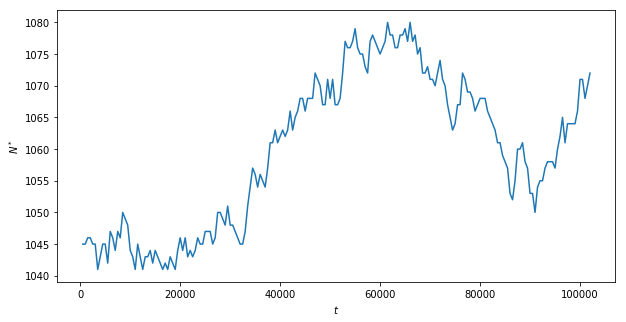

In [8]:
ts = np.arange(t0, df['t'].iloc[-1] + 1, t0)
preds = calc_pred(sleep_time=0, printing=False)
plt.figure(figsize=(10, 5))
plt.plot(ts, preds)
plt.xlabel(r'$t$')
plt.ylabel(r'$N^*$')
plt.show()

Построим еще схематично график среднего временного интервала между соседними поломками (это $\overline \xi$)

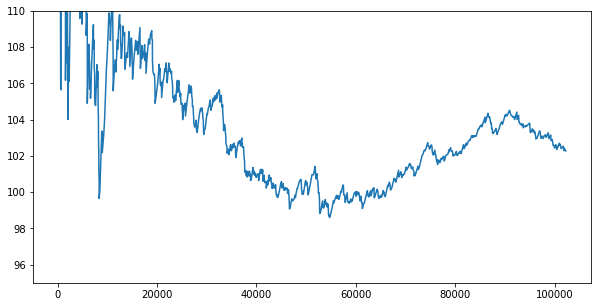

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df['t'], [df['t'].iloc[i] / (i + 1) for i in range(0, len(df))])
plt.ylim(95, 110)
plt.show()

Теперь запустим "честный" подсчет.

In [11]:
calc_pred()

1045
1045
1046
1046
1045
1045
1041
1043
1045
1045
1042
1047
1046
1044
1047
1046
1050
1049
1048
1044
1043
1041


KeyboardInterrupt: 

Не будем дожидаться конца работы программы с задержками.

#### Вывод: 

Видно, что предсказание, подсчитанное на основе УМО, действительно учитывает состояние выборки в выбранный момент времени. В период времени, когда поломки учащаются (спад на втором графике), предсказание количества поломок в момент $t_{fin}$ увеличивается, что соответствует здравому смыслу. При это предсказания в первые моменты времени, когда нам известно мало данных о поломках, не слишком сильно отличаются от предсказаний в конце, когда известны почти все данные, то есть метод можно применять и на небольших выборках.